In [263]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

% matplotlib inline

data = pd.read_csv('transactions_first_batch.csv', low_memory = False, dtype='O')


Check first and last five rows.

In [190]:
data.head().append(data.tail())

,Tran ID,Tran Date,Status,Filer/Committee,Contributor/Payee,Sub Type,Amount,committee_id
0,1454151,01/24/2013,Original,Speech Hearing Action Committee,Sara Gelser for State Representative (4680),Lost or Returned Check,$200.00,255
1,968825,11/30/2010,Original,Speech Hearing Action Committee,Oregon Speech Language Hearing Association,Cash Contribution,$53.00,255
2,934239,10/18/2010,Original,Speech Hearing Action Committee,Committee to Elect Dr. Alan Bates (3604),Cash Expenditure,$250.00,255
3,934242,10/18/2010,Original,Speech Hearing Action Committee,Frank Morse for State Senate (4335),Cash Expenditure,$250.00,255
4,934247,10/18/2010,Original,Speech Hearing Action Committee,Friends of Suzanne Bonamici (5254),Cash Expenditure,$200.00,255
88305,26967,12/21/2006,Original,"Lee, Charles E., for State Representative",Miscellaneous Personal Expenditures $100 and u...,Personal Expenditure for Reimbursement,$31.48,5328
88306,29612,12/21/2006,Amended,"Lee, Charles E., for State Representative","Mary E Lee, Treasurer",Cash Expenditure,$31.48,5328
88307,16136,12/05/2006,Original,"Lee, Charles E., for State Representative",Miscellaneous Cash Expenditures $100 and under,Cash Expenditure,$82.82,5328
88308,16135,12/01/2006,Original,"Lee, Charles E., for State Representative",Miscellaneous Cash Expenditures $100 and under,Cash Expenditure,$80.34,5328
88309,15872,11/29/2006,Original,"Lee, Charles E., for State Representative","Mary E Lee, Treasurer",Cash Expenditure,$700.00,5328


Clean "Amount" column by removing characters and setting as float.

In [191]:
## Amount
for i in ['$',',',')']:
    data.Amount = data.Amount.str.replace(i,'')
    
data.Amount = data.Amount.str.replace('(','-').astype(float)


Run a description of each, o get  get uniques

In [192]:
data.describe(include='all')

,Tran ID,Tran Date,Status,Filer/Committee,Contributor/Payee,Sub Type,Amount,committee_id
count,88310,88310,88310,88310,87530,88310,88310.000000,88310
unique,88310,4101,2,142,19500,29,NaN,104
top,1734643,11/09/2017,Original,Dentists of Oregon PAC,Miscellaneous Cash Contributions $100 and under,Cash Contribution,NaN,54
freq,1,1656,86331,5000,9442,49850,NaN,5000
mean,NaN,NaN,NaN,NaN,NaN,NaN,1116.298991,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,7272.454859,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,-29525.510000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,130.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,500.000000,NaN


Notes:
- There are 104 unique Committee Ids, were there supposed to be 100?

## In Depth 
** Status **

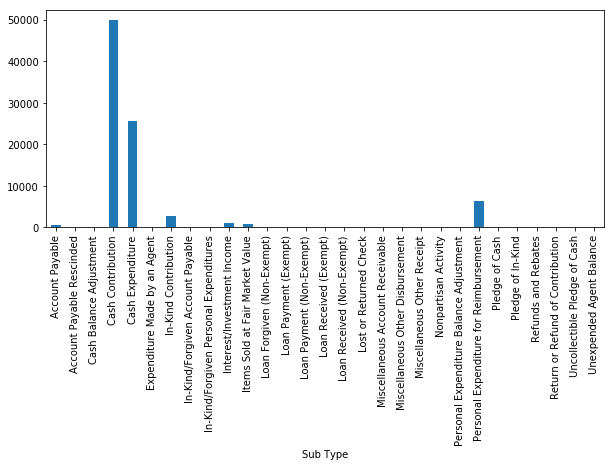

In [265]:
plt.figure(figsize = (10,4))
data.groupby('Sub Type').size().sort_index().plot('bar')

**status**

In [194]:
data.groupby('Status').size()

Status
Amended      1979
Original    86331
dtype: int64

In [216]:
data.groupby('Contributor/Payee').size().sort_index().head()

Contributor/Payee
1 & 1 Interent              3
1 and 1 Internet, Inc.      1
1&1 Internet Inc            1
1&1 Internet Inc.          19
1-800 Contacts, Inc. **     3
dtype: int64

Notes: 
- What does ** mean?
- Need to normalized by fuzzy match

Which rows have Null Values in "Contributor/Payee"

In [222]:
null_mask = data['Contributor/Payee'].isnull()

In [255]:
data[null_mask]['Sub Type'].unique()

array(['Interest/Investment Income', 'Cash Balance Adjustment',
       'Items Sold at Fair Market Value',
       'Personal Expenditure Balance Adjustment'], dtype=object)

In [248]:
null_subs =set(data[null_mask]['Sub Type'])
non_null_subs = set(data[~null_mask]['Sub Type'])
list(null_subs & non_null_subs)

['Cash Balance Adjustment',
 'Items Sold at Fair Market Value',
 'Interest/Investment Income',
 'Personal Expenditure Balance Adjustment']

Notes:
- Verify that Null Contributor/Payee is only associated with 4 types of Sub Type
